In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

Q1. Implement non-linear perceptron algorithm for the classification using Online Learning (Hebbian learning) algorithm. The dataset (data55.xlsx) contains 19 features and the last column is the output (class label). You can use hold-out cross-validation (70, 10, and 20%) for the selection of training, validation and test instances. Evaluate accuracy, sensitivity and specificity measures for the evaluation of test instances (Packages such as Scikitlearn, keras, tensorflow, pytorch etc. are not allowed).

In [ ]:
import numpy as np
import pandas as pd
import math

full_df=pd.read_excel('/content/drive/My Drive/nnfl_assignment_2_data/data55.xlsx',header=None,names=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","class"])

full_df=full_df.values
np.random.shuffle(full_df)

x_full=full_df[:,0:19]
y_full=full_df[:,19:20]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])

In [ ]:
def divide_tr_va_te(x_norm,y_norm):
  x_tr=x_norm[:math.floor(0.7*x_norm.shape[0])]
  x_va=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  x_te=x_norm[math.floor(0.8*x_norm.shape[0]):]

  y_tr=y_norm[:math.floor(0.7*y_norm.shape[0])]
  y_va=y_norm[math.floor(0.7*y_norm.shape[0]):math.floor(0.8*y_norm.shape[0])]
  y_te=y_norm[math.floor(0.8*y_norm.shape[0]):]
  return x_tr,x_va,x_te,y_tr,y_va,y_te

x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_va_te(x_norm,y_full)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def cost(y_pred,y):
  j=(-1/len(y))*(np.sum((y*np.log(y_pred))+(1-y)*np.log(1-y_pred)))
  return j

def hebbian_learning(x,y,w,alpha,iter):
  for t in range(iter):
    h=x@w
    for i in range(len(h)):
      if h[i][0]>=0.5:
        h[i][0]=1
      else:
        h[i][0]=0
    for i in range(len(x)):
      if h[i][0]!=y[i][0]:
        w=w+alpha*y[i][0]*(x[i].T.reshape(w.shape))
  return w

In [ ]:
alpha_arr=np.arange(0.0001,0.002,0.0001)
costs=np.ones(len(alpha_arr))
diff=np.zeros(len(alpha_arr))
diff_min=float('inf')
j_min=-1
iters=1000
for j in range(len(alpha_arr)):
  w=np.zeros((x_tr.shape[1],1),dtype=float)
  w=hebbian_learning(x_tr,y_tr,w,alpha_arr[j],iters)
  y_pred=x_va@w
  costs[j]=cost(y_pred,y_va)
  for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
  A=abs(y_pred-y_va)
  diff[j]=np.sum(A)
  if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
    diff_min=diff[j]
    j_min=j
    w_min=w
    alpha_min=alpha_arr[j]
print('alpha_min is ',alpha_min)
print('w_min is ',w_min)
print('wrongly predicted in validation data are: ',diff_min)

alpha_min is  0.0011
w_min is  [[ 0.5599    ]
 [ 0.01333556]
 [-0.01233791]
 [ 0.00670877]
 [ 0.04157979]
 [ 0.00068234]
 [ 0.00220272]
 [-0.02407642]
 [-0.01781437]
 [ 0.02680029]
 [-0.00805154]
 [ 0.03876431]
 [ 0.02098085]
 [ 0.00356079]
 [ 0.00209537]
 [-0.01537252]
 [-0.02299316]
 [-0.01484566]
 [ 0.00387973]
 [ 0.05821261]]
wrongly predicted in validation data are:  5.0


In [ ]:
def test_result(x_te,y_te,w):
  y_pred=x_te@w
  for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
      y_pred[i]=1
    else:
      y_pred[i]=0
  
  tn=0
  fp=0
  fn=0
  tp=0
  for i in range(len(y_pred)):
    if y_pred[i]==1:
      if y_te[i]==1:
        tp+=1
      else:
        fp+=1
    else:
      if y_te[i]==1:
        fn+=1
      else:
        tn+=1
  print('Confusion matrix is')
  print(f"[[{tn}  {fp}]")
  print(f" [{fn}  {tp}]]")

  accuracy=(tp+tn)/(len(y_te)) * 100
  sen=tp/(tp+fn) * 100
  spe=tn/(tn+fp) * 100
  print('Accuracy is ',accuracy)
  print('Sensitivity is ',sen)
  print('Specificity is ',spe)

test_result(x_te,y_te,w_min)

Confusion matrix is
[[13  9]
 [2  18]]
Accuracy is  73.80952380952381
Sensitivity is  90.0
Specificity is  59.09090909090909


Q2. Implement kernel perceptron algorithm for the classification task. The dataset (data55.xlsx) contains 19 features and the last column is the output (class label). You can use hold-out cross-validation (70, 10, and 20%) for the selection of training, validation and test instances. Evaluate accuracy, sensitivity and specificity measures for the evaluation of test instances. Evaluate the classification performance separately using linear, RBF, and polynomial kernels (Packages such as Scikitlearn, keras, tensorflow, pytorch etc. are not allowed).

In [ ]:
import numpy as np
import pandas as pd
import math

full_df=pd.read_excel('/content/drive/My Drive/nnfl_assignment_2_data/data55.xlsx',header=None,names=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","class"])

full_df=full_df.values
np.random.shuffle(full_df)

x_full=full_df[:,0:19]
y_full=full_df[:,19:20]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])

for i in range(len(y_full)):
  if(y_full[i]==0):
    y_full[i]=-1

In [ ]:
def divide_tr_va_te(x_norm,y_norm):
  x_tr=x_norm[:math.floor(0.7*x_norm.shape[0])]
  x_va=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  x_te=x_norm[math.floor(0.8*x_norm.shape[0]):]

  y_tr=y_norm[:math.floor(0.7*y_norm.shape[0])]
  y_va=y_norm[math.floor(0.7*y_norm.shape[0]):math.floor(0.8*y_norm.shape[0])]
  y_te=y_norm[math.floor(0.8*y_norm.shape[0]):]
  return x_tr,x_va,x_te,y_tr,y_va,y_te

x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_va_te(x_norm,y_full)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def kernel_linear(x_tr):
  k=x_tr@x_tr.T
  return k

def kernel_func_linear(x,z):
  return np.dot(x,z)

def kernel_perceptron(x_tr,y_tr,k,iter):
  delta=np.zeros((x_tr.shape[0],1))
  h=np.zeros((len(x_tr),1))
  for t in range(iter):
    for i in range(len(x_tr)):
      for l in range(len(x_tr)):
        h[i]=h[i]+(delta[l]*y_tr[l]*k[l][i])
      if h[i]>=0:
        h[i]=1
      else:
        h[i]=-1
      if h[i]!=y_tr[i]:
        delta[i]+=1
  return delta

def dist(x,z):
  d=np.sum((x-z)**2)
  return math.sqrt(d)

def kernel_rbf(x_tr):
  sigma=1
  for i in range(len(x_tr)):
    for j in range(len(x_tr)):
      k[i][j]=np.exp(-0.5*dist(x_tr[i],x_tr[j])/(sigma**2))
  return k

def kernel_func_rbf(x,z,sigma):
  return np.exp(-0.5*dist(x,z)/(sigma**2))

def kernel_poly(degree):
  k=(x_tr@x_tr.T)**degree
  return k

def kernel_func_poly(x,z,degree):
  return np.dot(x,z)**degree

In [ ]:
def predict_linear(delta,x_tr,y_tr,x_va):
  y_pred=np.zeros((len(x_va),y_te.shape[1]))
  for v in range(len(x_va)):
    for l in range(len(x_tr)):
      y_pred[v]+=delta[l]*y_tr[l]*kernel_func_linear(x_va[v],x_tr[l])
  return y_pred

def predict_rbf(delta,x_tr,y_tr,x_va):
  y_pred=np.zeros((len(x_va),y_te.shape[1]))
  for v in range(len(x_va)):
    for l in range(len(x_tr)):
      y_pred[v]+=delta[l]*y_tr[l]*kernel_func_rbf(x_va[v],x_tr[l],sigma=1)
  return y_pred

def predict_poly(delta,x_tr,y_tr,x_va,degree):
  y_pred=np.zeros((len(x_va),y_te.shape[1]))
  for v in range(len(x_va)):
    for l in range(len(x_tr)):
      y_pred[v]+=delta[l]*y_tr[l]*kernel_func_poly(x_va[v],x_tr[l],degree)
  return y_pred

In [ ]:
def test_result(y_pred,y_te):
  for i in range(len(y_pred)):  
    if(y_pred[i]>=0):
      y_pred[i]=1
    else:
      y_pred[i]=-1

  tn=0
  fp=0
  fn=0
  tp=0
  for i in range(len(y_pred)):
    if y_pred[i]==1:
      if y_te[i]==1:
        tp+=1
      else:
        fp+=1
    else:
      if y_te[i]==1:
        fn+=1
      else:
        tn+=1

  print('Confusion matrix is')
  print(f"[[{tn}  {fp}]")
  print(f" [{fn}  {tp}]]")

  accuracy=(tp+tn)/(len(y_te)) * 100
  sen=tp/(tp+fn) * 100
  spe=tn/(tn+fp) * 100
  print('Accuracy is ',accuracy)
  print('Sensitivity is ',sen)
  print('Specificity is ',spe)
  return accuracy,sen,spe

In [ ]:
iter=500

k=kernel_linear(x_tr)
delta=kernel_perceptron(x_tr,y_tr,k,iter)
print('---For validation data---')
y_pred_va=predict_linear(delta,x_tr,y_tr,x_va)
test_result(y_pred_va,y_va)
print('---For test data---')
y_pred=predict_linear(delta,x_tr,y_tr,x_te)
test_result(y_pred,y_te)

---For validation data---
Confusion matrix is
[[5  5]
 [1  10]]
Accuracy is  71.42857142857143
Sensitivity is  90.9090909090909
Specificity is  50.0
---For test data---
Confusion matrix is
[[12  4]
 [9  17]]
Accuracy is  69.04761904761905
Sensitivity is  65.38461538461539
Specificity is  75.0


(69.04761904761905, 65.38461538461539, 75.0)

In [ ]:
iter=500

k=kernel_rbf(x_tr)
delta=kernel_perceptron(x_tr,y_tr,k,iter)
print('---For validation data---')
y_pred_va=predict_rbf(delta,x_tr,y_tr,x_va)
test_result(y_pred_va,y_va)
print('---For test data---')
y_pred=predict_rbf(delta,x_tr,y_tr,x_te)
test_result(y_pred,y_te)

---For validation data---
Confusion matrix is
[[6  4]
 [1  10]]
Accuracy is  76.19047619047619
Sensitivity is  90.9090909090909
Specificity is  60.0
---For test data---
Confusion matrix is
[[7  9]
 [7  19]]
Accuracy is  61.904761904761905
Sensitivity is  73.07692307692307
Specificity is  43.75


In [ ]:
degree_arr=[3,4,5,6,7,9]
val_acc=[]
val_sen=[]
val_spe=[]
test_acc=[]
test_sen=[]
test_spe=[]

for i in range(len(degree_arr)):
  deg=degree_arr[i]
  print(f'For degree {deg}--------------------')
  k=kernel_poly(degree=deg)
  delta=kernel_perceptron(x_tr,y_tr,k,iter)
  print('---For validation data---')
  y_pred_va=predict_poly(delta,x_tr,y_tr,x_va,degree=deg)
  accuracy,sen,spe=test_result(y_pred_va,y_va)
  val_acc.append(accuracy)
  val_sen.append(sen)
  val_spe.append(spe)

  print('---For test data---')
  y_pred=predict_poly(delta,x_tr,y_tr,x_te,degree=deg)
  accuracy,sen,spe=test_result(y_pred,y_te)
  test_acc.append(accuracy)
  test_sen.append(sen)
  test_spe.append(spe)

For degree 3--------------------
---For validation data---
Confusion matrix is
[[6  4]
 [1  10]]
Accuracy is  76.19047619047619
Sensitivity is  90.9090909090909
Specificity is  60.0
---For test data---
Confusion matrix is
[[11  5]
 [10  16]]
Accuracy is  64.28571428571429
Sensitivity is  61.53846153846154
Specificity is  68.75
For degree 4--------------------
---For validation data---
Confusion matrix is
[[5  5]
 [3  8]]
Accuracy is  61.904761904761905
Sensitivity is  72.72727272727273
Specificity is  50.0
---For test data---
Confusion matrix is
[[11  5]
 [7  19]]
Accuracy is  71.42857142857143
Sensitivity is  73.07692307692307
Specificity is  68.75
For degree 5--------------------
---For validation data---
Confusion matrix is
[[4  6]
 [3  8]]
Accuracy is  57.14285714285714
Sensitivity is  72.72727272727273
Specificity is  40.0
---For test data---
Confusion matrix is
[[12  4]
 [10  16]]
Accuracy is  66.66666666666666
Sensitivity is  61.53846153846154
Specificity is  75.0
For degree 6--

In [ ]:
print('degree   validation accuracy   test accuracy')
for i in range(len(degree_arr)):
  deg=degree_arr[i]
  print(f'{deg}        {val_acc[i]}      {test_acc[i]}')

degree   validation accuracy   test accuracy
3        76.19047619047619      64.28571428571429
4        61.904761904761905      71.42857142857143
5        57.14285714285714      66.66666666666666
6        57.14285714285714      66.66666666666666
7        52.38095238095239      64.28571428571429
9        57.14285714285714      61.904761904761905


Q3. The dataset (data5.xlsx) contains 7 features and the last column is the output (class labels). Design a multilayer perceptron based neural network (two hidden layers) for the classification. You can use both holdout (70, 10, and 20%) and 5-fold cross-validation approaches for evaluating the performance of the classifier (individual accuracy and overall accuracy). You can select the number of hidden neurons of each hidden layer and other MLP parameters using grid-search method. (Packages such as Scikitlearn, keras, tensorflow, pytorch etc. are not allowed).

In [ ]:
import numpy as np
import pandas as pd
import math

full_df=pd.read_excel('/content/drive/My Drive/nnfl_assignment_2_data/data5.xlsx',header=None,names=["A","B","C","D","E","F","G","class"])

full_df=full_df.values
np.random.shuffle(full_df)

x_full=full_df[:,0:7]
y_full=full_df[:,7:8]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])

y_norm=np.zeros((len(y_full),3))

for i in range(len(y_full)):
  if y_full[i][0]==1:
    y_norm[i][0]=1
  elif y_full[i][0]==2:
    y_norm[i][1]=1
  elif y_full[i][0]==3:
    y_norm[i][2]=1

In [ ]:
def divide_tr_va_te(x_norm,y_norm):
  x_tr=x_norm[:math.floor(0.7*x_norm.shape[0])]
  x_va=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  x_te=x_norm[math.floor(0.8*x_norm.shape[0]):]

  y_tr=y_norm[:math.floor(0.7*y_norm.shape[0])]
  y_va=y_norm[math.floor(0.7*y_norm.shape[0]):math.floor(0.8*y_norm.shape[0])]
  y_te=y_norm[math.floor(0.8*y_norm.shape[0]):]
  return x_tr,x_va,x_te,y_tr,y_va,y_te

x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_va_te(x_norm,y_norm)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def fpa(x,y,wx,wy):
  v=x@wx
  z=sigmoid(v)
  o=np.ones((len(z),1))
  s=np.hstack((o,z))
  g=s@wy
  pred=sigmoid(g)
  j=np.mean(np.mean((pred-y)**2,axis=1))
  return pred,s,j

def bpa(x,y,wx,wy,pred,s,alpha):
  df=np.multiply(pred,(1-pred))
  dgy=np.multiply(df,(pred-y))
  dw2=alpha*(s.T@dgy)
  wy=wy-dw2
  df=np.multiply(s,(1-s))
  dgx=np.multiply(df,(dgy@wy.T))
  dwx=alpha*(x.T@dgx)
  wx=wx-dwx[:,1:]
  return wx,wy

def mlp(x,y,hidden,iter,alpha):
  wx=np.zeros((x.shape[1],hidden))
  wy=np.zeros((hidden+1,3))
  j_his=np.zeros((iter,1))
  for t in range(iter):
    pred,s,j=fpa(x,y,wx,wy)
    wx,wy=bpa(x,y,wx,wy,pred,s,alpha)
    j_his[t]=j
  return wx,wy,j_his

def test_result(x_te,y_te,wx,wy):
  pred,s,j=fpa(x_te,y_te,wx,wy)
  temp=pred
  for i in range(len(pred)):
    for j in range(pred.shape[1]):
      if(pred[i][j]<0.5):
        pred[i][j]=0
      else:
        pred[i][j]=1

  y_output=np.zeros((len(y_te),1))
  y_output_actual=np.zeros((len(y_te),1))

  for i in range(len(y_te)):
    y_output[i]=np.argmax(pred[i])+1
    y_output_actual[i]=np.argmax(y_te[i])+1

  confusion_matrix=pd.crosstab(y_output_actual.flatten(),y_output.flatten())
  confusion_matrix=np.asarray(confusion_matrix)
  print("Confusion matrix is ")
  print(confusion_matrix)
  acc=(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/len(x_te)*100
  print("Overall accuracy is ",acc)
  print("accuracy of class 1 is ",confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[0][2])*100)
  print("accuracy of class 2 is ",confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1]+confusion_matrix[1][2])*100)
  print("accuracy of class 3 is ",confusion_matrix[2][2]/(confusion_matrix[2][0]+confusion_matrix[2][1]+confusion_matrix[2][2])*100)

  return acc

In [ ]:
alpha_arr=np.arange(0.01,0.31,0.01)
alpha_cap_arr=np.arange(2,11,1)

j_va_arr=np.zeros((len(alpha_arr),len(alpha_cap_arr)))

wx_arr=[]
wy_arr=[]

iter=500

for i in range(len(alpha_arr)):
  for j in range(len(alpha_cap_arr)):
    alpha=alpha_arr[i]
    alpha_cap=alpha_cap_arr[j]
    hidden=(int)(len(x_tr)/(alpha_cap*(x_tr.shape[1]+3)))
    wx,wy,j_his=mlp(x_tr,y_tr,hidden,iter,alpha)

    pred_va,s_va,j_va=fpa(x_va,y_va,wx,wy)
    j_va_arr[i][j]=j_va

    wx_arr.append(wx)
    wy_arr.append(wy)

result = np.where(j_va_arr == np.amin(j_va_arr))
listOfCordinates = list(zip(result[0], result[1]))
index=listOfCordinates[0]
wx_min=wx_arr[index[0]*len(alpha_cap_arr) + index[1]]
wy_min=wy_arr[index[0]*len(alpha_cap_arr) + index[1]]

In [ ]:
test_result(x_te,y_te,wx_min,wy_min)

Confusion matrix is 
[[13  0  0]
 [ 0 15  0]
 [ 2  0 12]]
Overall accuracy is  95.23809523809523
accuracy of class 1 is  100.0
accuracy of class 2 is  100.0
accuracy of class 3 is  85.71428571428571


95.23809523809523

In [ ]:
def divide_tr_te_k_fold(x_norm,y_norm,k):
  batch_size=math.floor(len(x_norm)/k)
  x_norm_k=[]
  y_norm_k=[]
  start=0
  end=batch_size
  for t in range(5):
    if(t==4):
      x_norm_k.append(x_norm[start:])
      y_norm_k.append(y_norm[start:])
    else:
      x_norm_k.append(x_norm[start:end])
      y_norm_k.append(y_norm[start:end])
    start=end
    end=end+batch_size
  return x_norm_k,y_norm_k
  
x_norm_k,y_norm_k=divide_tr_te_k_fold(x_norm,y_norm,5)

In [ ]:
def calculate(x_tr,y_tr,x_va,y_va,x_te,y_te):
  alpha_arr=np.arange(0.01,0.21,0.01)
  alpha_cap_arr=np.arange(2,11,1)

  j_va_arr=np.zeros((len(alpha_arr),len(alpha_cap_arr)))

  wx_arr=[]
  wy_arr=[]


  for i in range(len(alpha_arr)):
    for j in range(len(alpha_cap_arr)):
      alpha=alpha_arr[i]
      alpha_cap=alpha_cap_arr[j]
      hidden=(int)(len(x_tr)/(alpha_cap*(x_tr.shape[1]+3)))
      wx,wy,j_his=mlp(x_tr,y_tr,hidden,iter,alpha)

      pred_va,s_va,j_va=fpa(x_va,y_va,wx,wy)
      j_va_arr[i][j]=j_va

      wx_arr.append(wx)
      wy_arr.append(wy)

  result = np.where(j_va_arr == np.amin(j_va_arr))
  listOfCordinates = list(zip(result[0], result[1]))
  index=listOfCordinates[0]
  hidden=(int)(len(x_tr)/(alpha_cap_arr[index[1]]*(x_tr.shape[1]+3)))
  print(f"alpha is {alpha_arr[index[0]]}, hidden neurons are {hidden}")
  wx_min=wx_arr[index[0]*len(alpha_cap_arr)+index[1]]
  wy_min=wy_arr[index[0]*len(alpha_cap_arr)+index[1]]

  return test_result(x_te,y_te,wx_min,wy_min)

In [ ]:
acc_arr=[]
for z in range(len(x_norm_k)):
  x_te=x_norm_k[z]
  y_te=y_norm_k[z]
  x_tr=np.ndarray((0,x_norm_k[z].shape[1]))
  y_tr=np.ndarray((0,y_norm_k[z].shape[1]))
  for q in range(len(x_norm_k)):
    if (z==q):
      continue
    x_tr=np.concatenate((x_tr,x_norm_k[q]),axis=0)
    y_tr=np.concatenate((y_tr,y_norm_k[q]),axis=0)

  x_va=x_tr[math.floor(0.9*x_tr.shape[0]):]
  y_va=y_tr[math.floor(0.9*y_tr.shape[0]):]

  x_tr=x_tr[:math.floor(0.9*x_tr.shape[0])]
  y_tr=y_tr[:math.floor(0.9*y_tr.shape[0])]

  accuracy=calculate(x_tr,y_tr,x_va,y_va,x_te,y_te)
  acc_arr.append(accuracy)
print('---------------')
print('Average accuracy is ',sum(acc_arr)/len(acc_arr))
print('---------------')

alpha is 0.18000000000000002, hidden neurons are 6
Confusion matrix is 
[[ 9  0  0]
 [ 1 15  0]
 [ 1  0 16]]
Overall accuracy is  95.23809523809523
accuracy of class 1 is  100.0
accuracy of class 2 is  93.75
accuracy of class 3 is  94.11764705882352
alpha is 0.08, hidden neurons are 6
Confusion matrix is 
[[13  0  2]
 [ 1 14  0]
 [ 0  0 12]]
Overall accuracy is  92.85714285714286
accuracy of class 1 is  86.66666666666667
accuracy of class 2 is  93.33333333333333
accuracy of class 3 is  100.0
alpha is 0.14, hidden neurons are 6
Confusion matrix is 
[[14  0  0]
 [ 1 13  0]
 [ 0  0 14]]
Overall accuracy is  97.61904761904762
accuracy of class 1 is  100.0
accuracy of class 2 is  92.85714285714286
accuracy of class 3 is  100.0
alpha is 0.15000000000000002, hidden neurons are 6
Confusion matrix is 
[[18  1  0]
 [ 0 10  0]
 [ 2  0 11]]
Overall accuracy is  92.85714285714286
accuracy of class 1 is  94.73684210526315
accuracy of class 2 is  100.0
accuracy of class 3 is  84.61538461538461
alpha 

Q4. Implement the radial basis function neural network (RBFNN) for the classification problem. You can use Gaussian, multiquadric and linear kernel functions for the implementation. You can use both holdout (70, 10, and 20%) and 5-fold cross-validation approaches for evaluating the performance of the classifier. The classification performance must be evaluated using individual accuracy and overall accuracy measures. The dataset (data5.xlsx) contains 7 features and the last column is the output (class labels). (Packages such as Scikitlearn, keras, tensorflow, pytorch etc. are not allowed).

In [ ]:
import numpy as np
import pandas as pd
import math

full_df=pd.read_excel('/content/drive/My Drive/nnfl_assignment_2_data/data5.xlsx',header=None,names=["A","B","C","D","E","F","G","class"])

full_df=full_df.values
np.random.shuffle(full_df)

x_full=full_df[:,0:7]
y_full=full_df[:,7:8]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])

y_norm=np.zeros((len(y_full),3))

for i in range(len(y_full)):
  if y_full[i][0]==1:
    y_norm[i][0]=1
  elif y_full[i][0]==2:
    y_norm[i][1]=1
  elif y_full[i][0]==3:
    y_norm[i][2]=1

In [ ]:
def divide_tr_va_te(x_norm,y_norm):
  x_tr=x_norm[:math.floor(0.7*x_norm.shape[0])]
  x_va=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  x_te=x_norm[math.floor(0.8*x_norm.shape[0]):]

  y_tr=y_norm[:math.floor(0.7*y_norm.shape[0])]
  y_va=y_norm[math.floor(0.7*y_norm.shape[0]):math.floor(0.8*y_norm.shape[0])]
  y_te=y_norm[math.floor(0.8*y_norm.shape[0]):]
  return x_tr,x_va,x_te,y_tr,y_va,y_te

x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_va_te(x_norm,y_norm)

In [ ]:
def norm(x):
  return math.sqrt(np.sum(x**2))

In [ ]:
def k_means(k,full):
  l=np.ones((len(full),1))
  for i in range(len(full)):
    l[i][0]=np.random.randint(1,k+1)

  def dist(x,u):
    d=0
    for j in range(len(x)):
      d=d+((x[j]-u[0][j])**2)
    return math.sqrt(d)

  def update(l,full):
    u=[]
    groups=[]
    for i in range(k):
      groups.append(np.ndarray((0,full.shape[1])))
    for index in range(len(full)):
      groups[int(l[index][0])-1]=np.concatenate((groups[int(l[index][0])-1],full[index].reshape(1,full.shape[1])),axis=0)
    for i in range(k):
      u_temp=np.zeros((1,full.shape[1]))
      group=groups[i]
      if len(group)==0:
        u.append(u_temp)
        continue
      for j in range(full.shape[1]):
        u_temp[0][j]=np.mean(group[:,j:j+1])
      u.append(u_temp)
    l_new=np.ones((len(full),1))
    for index in range(len(full)):
      distances=np.zeros(k)
      for i in range(k):
        distances[i]=dist(full[index],u[i])
      l_new[index][0]=np.argmin(distances)+1
  
    return l_new

  def check(l,l_new):
    for k in range(len(l)):
      if l[k][0]!=l_new[k][0]:
        return False
    return True

  l_new=update(l,full)
  while(not check(l,l_new)):
    l=l_new
    l_new=update(l,full)

  groups=[]
  for i in range(k):
    groups.append(np.ndarray((0,full.shape[1])))
  for index in range(len(full)):
    groups[int(l_new[index][0])-1]=np.concatenate((groups[int(l_new[index][0])-1],full[index].reshape(1,full.shape[1])),axis=0)
  
  u=[]
  for i in range(k):
    u_temp=np.zeros((1,full.shape[1]))
    group=groups[i]
    if len(group)==0:
      u.append(u_temp)
      continue
    for j in range(full.shape[1]):
      u_temp[0][j]=np.mean(group[:,j:j+1])
    u.append(u_temp)

  betas_arr=np.zeros((k,1))
  for i in range(len(betas_arr)):
    sigma=(1/len(groups[i]))*np.sum(norm(groups[i]-u[i]))
    betas_arr[i]=1/(2*sigma*sigma)

  return u,betas_arr


In [ ]:
def test_result(y_output_actual,y_output):
  confusion_matrix=pd.crosstab(y_output_actual.flatten(),y_output.flatten())
  confusion_matrix=np.asarray(confusion_matrix)
  print("Confusion matrix is ")
  print(confusion_matrix)
  acc=(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/len(x_te)*100
  print("Overall accuracy is ",acc)
  print("accuracy of class 1 is ",confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[0][2])*100)
  print("accuracy of class 2 is ",confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1]+confusion_matrix[1][2])*100)
  print("accuracy of class 3 is ",confusion_matrix[2][2]/(confusion_matrix[2][0]+confusion_matrix[2][1]+confusion_matrix[2][2])*100)

  return acc

In [ ]:
k_arr=np.arange(5,20,1)
k_max=0
max_acc_va=0
w_max=0
u_max=0
betas_arr_max=0

for i in range(len(k_arr)):
  k=k_arr[i]
  print("---------------")
  print("for k ",k)
  try:
    u,betas_arr=k_means(k,x_tr)
  except:
    print("break")
    break
  h=np.zeros((len(x_tr),k))

  for i in range(len(x_tr)):
    for j in range(k):
      h[i][j]=np.exp(-1*betas_arr[j]*((norm(x_tr[i]-u[j])**2)))

  w=np.linalg.pinv(h)@y_tr

  h_va=np.zeros((len(x_va),k))

  for i in range(len(x_va)):
    for j in range(len(u)):
      h_va[i][j]=np.exp(-1*betas_arr[j]*((norm(x_va[i]-u[j])**2)))

  y_pred_va=h_va@w

  pred_va=np.zeros((len(x_va),1))
  y_va_actual=np.zeros((len(x_va),1))
  for i in range(len(y_pred_va)):
    pred_va[i]=np.argmax(y_pred_va[i])+1
    y_va_actual[i]=np.argmax(y_va[i])+1

  acc_va=test_result(y_va_actual,pred_va)

  if acc_va>=max_acc_va:
    max_acc_va=acc_va
    k_max=k
    w_max=w
    u_max=u
    betas_arr_max=betas_arr

print('k-means where the validation acc is max is at k=',k_max)

---------------
for k  5
Confusion matrix is 
[[8 0 2]
 [0 8 0]
 [0 0 3]]
Overall accuracy is  45.23809523809524
accuracy of class 1 is  80.0
accuracy of class 2 is  100.0
accuracy of class 3 is  100.0
---------------
for k  6
Confusion matrix is 
[[7 2 1]
 [1 6 1]
 [1 0 2]]
Overall accuracy is  35.714285714285715
accuracy of class 1 is  70.0
accuracy of class 2 is  75.0
accuracy of class 3 is  66.66666666666666
---------------
for k  7
Confusion matrix is 
[[10  0  0]
 [ 0  8  0]
 [ 1  0  2]]
Overall accuracy is  47.61904761904761
accuracy of class 1 is  100.0
accuracy of class 2 is  100.0
accuracy of class 3 is  66.66666666666666
---------------
for k  8
Confusion matrix is 
[[8 0 2]
 [0 8 0]
 [0 0 3]]
Overall accuracy is  45.23809523809524
accuracy of class 1 is  80.0
accuracy of class 2 is  100.0
accuracy of class 3 is  100.0
---------------
for k  9
Confusion matrix is 
[[10  0  0]
 [ 0  8  0]
 [ 1  0  2]]
Overall accuracy is  47.61904761904761
accuracy of class 1 is  100.0
accura

In [ ]:
h=np.zeros((len(x_te),k_max))

for i in range(len(x_te)):
  for j in range(len(u_max)):
    h[i][j]=np.exp(-1*betas_arr_max[j]*( (norm(x_te[i]-u_max[j])**2) ))

y_pred=h@w_max

pred=np.zeros((len(x_te),1))
y_te_actual=np.zeros((len(x_te),1))
for i in range(len(y_pred)):
  pred[i]=np.argmax(y_pred[i])+1
  y_te_actual[i]=np.argmax(y_te[i])+1

test_result(y_te_actual,pred)

Confusion matrix is 
[[10  1  3]
 [ 0 15  0]
 [ 1  0 12]]
Overall accuracy is  88.09523809523809
accuracy of class 1 is  71.42857142857143
accuracy of class 2 is  100.0
accuracy of class 3 is  92.3076923076923


88.09523809523809

In [ ]:
def divide_tr_te_k_fold(x_norm,y_norm,k):
  batch_size=math.floor(len(x_norm)/k)
  x_norm_k=[]
  y_norm_k=[]
  start=0
  end=batch_size
  for t in range(5):
    if(t==4):
      x_norm_k.append(x_norm[start:])
      y_norm_k.append(y_norm[start:])
    else:
      x_norm_k.append(x_norm[start:end])
      y_norm_k.append(y_norm[start:end])
    start=end
    end=end+batch_size
  return x_norm_k,y_norm_k

x_norm_k,y_norm_k=divide_tr_te_k_fold(x_norm,y_norm,5)

In [ ]:
def calculate(x_tr,y_tr,x_va,y_va,x_te,y_te):
  k_arr=np.arange(5,20,1)
  k_max=0
  max_acc_va=0
  w_max=0
  u_max=0
  betas_arr_max=0

  for i in range(len(k_arr)):
    k=k_arr[i]
    print("---------------")
    print("for k ",k)
    try:
      u,betas_arr=k_means(k,x_tr)
    except:
      print("break")
      break
    h=np.zeros((len(x_tr),k))

    for i in range(len(x_tr)):
      for j in range(k):
        h[i][j]=np.exp(-1*betas_arr[j]*((norm(x_tr[i]-u[j])**2)))

    w=np.linalg.pinv(h)@y_tr

    h_va=np.zeros((len(x_va),k))

    for i in range(len(x_va)):
      for j in range(len(u)):
        h_va[i][j]=np.exp(-1*betas_arr[j]*((norm(x_va[i]-u[j])**2)))

    y_pred_va=h_va@w

    pred_va=np.zeros((len(x_va),1))
    y_va_actual=np.zeros((len(x_va),1))
    for i in range(len(y_pred_va)):
      pred_va[i]=np.argmax(y_pred_va[i])+1
      y_va_actual[i]=np.argmax(y_va[i])+1

    acc_va=test_result(y_va_actual,pred_va)

    if acc_va>=max_acc_va:
      max_acc_va=acc_va
      k_max=k
      w_max=w
      u_max=u
      betas_arr_max=betas_arr

  print('k-means where the validation acc is max is at k=',k_max)
  print("For test data")
  h=np.zeros((len(x_te),k_max))

  for i in range(len(x_te)):
    for j in range(len(u_max)):
      h[i][j]=np.exp(-1*betas_arr_max[j]*((norm(x_te[i]-u_max[j])**2)))

  y_pred=h@w_max

  pred=np.zeros((len(x_te),1))
  y_te_actual=np.zeros((len(x_te),1))
  for i in range(len(y_pred)):
    pred[i]=np.argmax(y_pred[i])+1
    y_te_actual[i]=np.argmax(y_te[i])+1

  acc=test_result(y_te_actual,pred)
  return acc,k_max

In [ ]:
acc_arr=[]
k_max_arr=[]
for z in range(len(x_norm_k)):
  print('-------------------------------')
  print("For Fold ",z+1)
  print('-------------------------------')
  x_te=x_norm_k[z]
  y_te=y_norm_k[z]

  x_tr=np.ndarray((0,x_norm_k[z].shape[1]))
  y_tr=np.ndarray((0,y_norm_k[z].shape[1]))
  for q in range(len(x_norm_k)):
    if (z==q):
      continue
    x_tr=np.concatenate((x_tr,x_norm_k[q]),axis=0)
    y_tr=np.concatenate((y_tr,y_norm_k[q]),axis=0)

  x_va=x_tr[math.floor(0.9*x_tr.shape[0]):]
  y_va=y_tr[math.floor(0.9*y_tr.shape[0]):]

  x_tr=x_tr[:math.floor(0.9*x_tr.shape[0])]
  y_tr=y_tr[:math.floor(0.9*y_tr.shape[0])]

  accuracy,k_max=calculate(x_tr,y_tr,x_va,y_va,x_te,y_te)
  acc_arr.append(accuracy)
  k_max_arr.append(k_max)
print('---------------')
print('Average accuracy is ',sum(acc_arr)/len(acc_arr))
print('---------------')

-------------------------------
For Fold  1
-------------------------------
---------------
for k  5
Confusion matrix is 
[[1 6 0]
 [0 6 0]
 [0 0 4]]
Overall accuracy is  26.190476190476193
accuracy of class 1 is  14.285714285714285
accuracy of class 2 is  100.0
accuracy of class 3 is  100.0
---------------
for k  6
Confusion matrix is 
[[4 2 1]
 [0 6 0]
 [0 0 4]]
Overall accuracy is  33.33333333333333
accuracy of class 1 is  57.14285714285714
accuracy of class 2 is  100.0
accuracy of class 3 is  100.0
---------------
for k  7
Confusion matrix is 
[[4 1 2]
 [0 6 0]
 [1 0 3]]
Overall accuracy is  30.952380952380953
accuracy of class 1 is  57.14285714285714
accuracy of class 2 is  100.0
accuracy of class 3 is  75.0
---------------
for k  8
Confusion matrix is 
[[5 0 2]
 [0 5 1]
 [0 0 4]]
Overall accuracy is  33.33333333333333
accuracy of class 1 is  71.42857142857143
accuracy of class 2 is  83.33333333333334
accuracy of class 3 is  100.0
---------------
for k  9
Confusion matrix is 
[[3 

In [ ]:
print('Fold   k    accuracy')
for i in range(5):
  print(f'{i+1}      {k_max_arr[i]}    {acc_arr[i]}')

Fold   k    accuracy
1      10    88.09523809523809
2      8    92.85714285714286
3      5    88.09523809523809
4      6    80.95238095238095
5      13    88.09523809523809


Q5. Implement the stacked autoencoder based deep neural network for the classification problem. The deep neural network must contain 3 hidden layers from three autoencoders. You can use holdout (70, 10, and 20%) cross-validation technique for selecting, training and test instances for the classifier. The dataset (data5.xlsx) contains 7 features and the last column is the output (class labels). For autoencoder implementation, please use back propagation algorithm discussed in the class. Evaluate individual accuracy and overall accuracy. (Packages such as Scikitlearn, keras, tensorflow, pytorch etc. are not allowed).

In [ ]:
import numpy as np
import pandas as pd
import math

full_df=pd.read_excel('/content/drive/My Drive/nnfl_assignment_2_data/data5.xlsx',header=None,names=["A","B","C","D","E","F","G","class"])

full_df=full_df.values
np.random.shuffle(full_df)

x_full=full_df[:,0:7]
y_full=full_df[:,7:8]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])

y_norm=np.zeros((len(y_full),3))

for i in range(len(y_full)):
  if y_full[i][0]==1:
    y_norm[i][0]=1
  elif y_full[i][0]==2:
    y_norm[i][1]=1
  elif y_full[i][0]==3:
    y_norm[i][2]=1

In [ ]:
def divide_tr_va_te(x_norm,y_norm):
  x_tr=x_norm[:math.floor(0.7*x_norm.shape[0])]
  x_va=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  x_te=x_norm[math.floor(0.8*x_norm.shape[0]):]

  y_tr=y_norm[:math.floor(0.7*y_norm.shape[0])]
  y_va=y_norm[math.floor(0.7*y_norm.shape[0]):math.floor(0.8*y_norm.shape[0])]
  y_te=y_norm[math.floor(0.8*y_norm.shape[0]):]
  return x_tr,x_va,x_te,y_tr,y_va,y_te

x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_va_te(x_norm,y_norm)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def delta_sigm(x):
  return np.multiply(x,1-x)

def fpa(inp,w1,b1,w2,b2):
  h=inp@w1+b1
  h=sigmoid(h)
  h2=h@w2+b2
  h2=sigmoid(h2)
  return inp,h,h2

def bpa(inp,a1,a2,a3,w1,b1,w2,b2,alpha,lam):
  delta3=-1*((inp-a3)*delta_sigm(a3))
  delta2=np.multiply(delta_sigm(a2),(delta3 @ w2.T))

  w2=w2*(1-alpha*lam)-(alpha)*(a2.T @ delta3)
  w1=w1*(1-alpha*lam)-(alpha)*(a1.T @ delta2)
  b2=b2-(alpha)*np.sum(delta3,axis=0)
  b1=b1-(alpha)*np.sum(delta2,axis=0)
  return w1,b1,w2,b2

def cost(w1,b1,w2,b2,inp,a1,a2,a3,lam,hidden):
  err_sq=((a3-inp)**2)/2
  err=np.sum(np.sum(err_sq))/len(inp)
  err2=(lam/2) * (np.sum(np.sum(w1**2))+np.sum(np.sum(w2**2)))
  j=err+err2
  return j

def error(pred,act):
  return np.sum((pred-act)**2)/len(pred)

In [ ]:
def pre_training(x_tr,x_va,hidden_least,hidden_max):
  hidden_arr=np.arange(hidden_least,hidden_max+1,1)

  alpha_arr=np.arange(0.01,0.1,0.01)
  lam_arr=np.arange(0.1,1,0.1)

  j_min=float('inf')
  alpha_min=-1
  lam_min=-1
  hidden_min=-1
  w1_min=-1
  b1_min=-1
  
  w2_min=-1
  b2_min=-1

  inp=x_tr

  for hidden_index in range(len(hidden_arr)):
    for alpha_index in range(len(alpha_arr)):
      for lam_index in range(len(lam_arr)):
        hidden=hidden_arr[hidden_index]
        alpha=alpha_arr[alpha_index]
        lam=lam_arr[lam_index]

        w1=np.zeros((inp.shape[1],hidden))
        w2=np.zeros((hidden,inp.shape[1]))
        b1=np.zeros((1,hidden))
        b2=np.zeros((1,inp.shape[1]))

        for i in range(500):
          a1,a2,a3=fpa(inp,w1,b1,w2,b2)
          w1,b1,w2,b2=bpa(inp,a1,a2,a3,w1,b1,w2,b2,alpha,lam)

        a1,a2,a3=fpa(x_va,w1,b1,w2,b2)
        j=error(a3,x_va)
        if j<=j_min:
          j_min=j
          hidden_min=hidden
          alpha_min=alpha
          lam_min=lam
          w1_min=w1
          b1_min=b1
          w2_min=w2       
          b2_min=b2
  print(f'Number of hidden neurons is {hidden_min}, error_min is {j_min}, alpha is {alpha_min}, lambda is {lam_min}')
  return hidden_min,w1_min,b1_min,w2_min,b2_min

In [ ]:
#pre-training

#autoencoder 1
hidden_1,w1,b1,w12,b12=pre_training(x_tr,x_va,5,x_tr.shape[1]-1)
a11_tr,a12_tr,a13_tr=fpa(x_tr,w1,b1,w12,b12)
a11_va,a12_va,a13_va=fpa(x_va,w1,b1,w12,b12)

#autoencoder 2
hidden_2,w2,b2,w22,b22=pre_training(a12_tr,a12_va,4,hidden_1-1)
a21_tr,a22_tr,a23_tr=fpa(a12_tr,w2,b2,w22,b22)
a21_va,a22_va,a23_va=fpa(a12_va,w2,b2,w22,b22)

#autoencoder 3
hidden_3,w3,b3,w33,b33=pre_training(a22_tr,a22_va,3,hidden_2-1)

Number of hidden neurons is 7, error_min is 3.255564397863491, alpha is 0.08, lambda is 0.1
Number of hidden neurons is 6, error_min is 0.1882145481540308, alpha is 0.060000000000000005, lambda is 0.1
Number of hidden neurons is 5, error_min is 0.007076357586579558, alpha is 0.060000000000000005, lambda is 0.1


In [ ]:
def fpa_stack(inp,w1,b1,w2,b2,w3,b3,w4,b4):
  h1=inp@w1+b1
  h1=sigmoid(h1)
  h2=h1@w2+b2
  h2=sigmoid(h2)
  h3=h2@w3+b3
  h3=sigmoid(h3)
  h4=h3@w4+b4
  h4=sigmoid(h4)
  
  return inp,h1,h2,h3,h4

def bpa_stack(a1,a2,a3,a4,a5,w1,b1,w2,b2,w3,b3,w4,b4,alpha,lam,y_tr):
  delta5=-1*(np.multiply(y_tr-a5,delta_sigm(a5)))
  delta4=np.multiply((delta5 @ w4.T),delta_sigm(a4))
  delta3=np.multiply((delta4 @ w3.T),delta_sigm(a3))
  delta2=np.multiply((delta3 @ w2.T),delta_sigm(a2))

  w4=w4*(1-alpha*lam)-(alpha)*(a4.T @ delta5)  
  w3=w3*(1-alpha*lam)-(alpha)*(a3.T @ delta4)
  w2=w2*(1-alpha*lam)-(alpha)*(a2.T @ delta3)
  w1=w1*(1-alpha*lam)-(alpha)*(a1.T @ delta2)

  b4=b4-(alpha)*np.sum(delta5,axis=0)
  b3=b3-(alpha)*np.sum(delta4,axis=0)
  b2=b2-(alpha)*np.sum(delta3,axis=0)
  b1=b1-(alpha)*np.sum(delta2,axis=0)
  return w1,b1,w2,b2,w3,b3,w4,b4

def cost_stack(w1,b1,w2,b2,w3,b3,w4,b4,inp,a5,lam,y_tr):
  err_sq=((a5-y_tr)**2)/2
  err=np.sum(np.sum(err_sq))/len(inp)
  err2=(lam/2) * (np.sum(np.sum(w1**2))+np.sum(np.sum(w2**2))+np.sum(np.sum(w3**2))+np.sum(np.sum(w4**2)))
  j=err+err2
  return j

def hot_decoding(matrix):
  temp=np.zeros((len(matrix),1))
  for i in range(len(matrix)):
    temp[i]=np.argmax(matrix[i])+1
  return temp

def wrong_pred(y_pred,y_te):
  y_pred_dec=hot_decoding(y_pred)
  y_te_dec=hot_decoding(y_te)
  err=0
  for i in range(len(y_te)):
    if y_pred_dec[i]!=y_te_dec[i]:
      err+=1
  return err

In [ ]:
def stacked(x_tr,y_tr,x_va,y_va,w1_opt,b1_opt,w2_opt,b2_opt,w3_opt,b3_opt,hidden_3):
  alpha_arr=np.arange(0.01,0.1,0.01)
  lam_arr=np.arange(0.1,1,0.1)

  j_min=float('inf')
  alpha_min=0
  lam_min=0
  w1_min=0
  w2_min=0
  w3_min=0
  w4_min=0

  b1_min=0
  b2_min=0
  b3_min=0
  b4_min=0

  inp=x_tr
  for alpha_index in range(len(alpha_arr)):
    for lam_index in range(len(lam_arr)):
      w1=w1_opt
      b1=b1_opt
      w2=w2_opt
      b2=b2_opt
      w3=w3_opt
      b3=b3_opt
      alpha=alpha_arr[alpha_index]
      lam=lam_arr[lam_index]

      w4=np.zeros((hidden_3,3))
      b4=np.zeros((1,3))

      for i in range(500):
        a1,a2,a3,a4,a5=fpa_stack(inp,w1,b1,w2,b2,w3,b3,w4,b4)
        w1,b1,w2,b2,w3,b3,w4,b4=bpa_stack(a1,a2,a3,a4,a5,w1,b1,w2,b2,w3,b3,w4,b4,alpha,lam,y_tr)

      a1,a2,a3,a4,a5=fpa_stack(x_va,w1,b1,w2,b2,w3,b3,w4,b4)
      j=wrong_pred(a5,y_va)
      if j<=j_min:
        j_min=j
        alpha_min=alpha
        lam_min=lam
        w1_min=w1
        w2_min=w2
        w3_min=w3
        w4_min=w4

        b1_min=b1
        b2_min=b2
        b3_min=b3
        b4_min=b4
  print(f'j is {j_min}, alpha is {alpha_min}, lambda is {lam_min}')
  return w1_min,b1_min,w2_min,b2_min,w3_min,b3_min,w4_min,b4_min

In [ ]:
w1_stack,b1_stack,w2_stack,b2_stack,w3_stack,b3_stack,w4_stack,b4_stack=stacked(x_tr,y_tr,x_va,y_va,w1,b1,w2,b2,w3,b3,hidden_3)

j is 0, alpha is 0.05, lambda is 0.1


In [ ]:
a1,a2,a3,a4,a5=fpa_stack(x_te,w1_stack,b1_stack,w2_stack,b2_stack,w3_stack,b3_stack,w4_stack,b4_stack)

y_output_actual=hot_decoding(y_te)
y_output=hot_decoding(a5)

confusion_matrix=pd.crosstab(y_output_actual.flatten(),y_output.flatten())
confusion_matrix=np.asarray(confusion_matrix)
print("Confusion matrix is ")
print(confusion_matrix)
acc=(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/len(x_te)*100
print("Overall accuracy is ",acc)
for i in range(3):
  acc=confusion_matrix[i][i]/(np.sum(confusion_matrix[i]))
  print(f"Accuracy of class {i+1} :",acc*100)

Confusion matrix is 
[[13  2  1]
 [ 1 14  0]
 [ 1  0 10]]
Overall accuracy is  88.09523809523809
Accuracy of class 1 : 81.25
Accuracy of class 2 : 93.33333333333333
Accuracy of class 3 : 90.9090909090909


Q6. Implement extreme learning machine (ELM) classifier for the classification. You can use Gaussian and tanh activation functions. Please select the training and test instances using 5-fold cross-validation technique Evaluate individual accuracy and overall accuracy. The dataset (data5.xlsx) contains 7 features and the last column is the output (class labels). (Packages such as Scikitlearn, keras, tensorflow, pytorch etc. are not allowed).

In [ ]:
import numpy as np
import pandas as pd
import math

full_df=pd.read_excel('/content/drive/My Drive/nnfl_assignment_2_data/data5.xlsx',header=None,names=["A","B","C","D","E","F","G","class"])

full_df=full_df.values
np.random.shuffle(full_df)

x_full=full_df[:,0:7]
y_full=full_df[:,7:8]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])

y_norm=np.zeros((len(y_full),3))

for i in range(len(y_full)):
  if y_full[i][0]==1:
    y_norm[i][0]=1
  elif y_full[i][0]==2:
    y_norm[i][1]=1
  elif y_full[i][0]==3:
    y_norm[i][2]=1

In [ ]:
def divide_tr_te_k_fold(x_norm,y_norm,k):
  batch_size=math.floor(len(x_norm)/k)
  x_norm_k=[]
  y_norm_k=[]
  start=0
  end=batch_size
  for t in range(5):
    if(t==4):
      x_norm_k.append(x_norm[start:])
      y_norm_k.append(y_norm[start:])
    else:
      x_norm_k.append(x_norm[start:end])
      y_norm_k.append(y_norm[start:end])
    start=end
    end=end+batch_size
  return x_norm_k,y_norm_k

x_norm_k,y_norm_k=divide_tr_te_k_fold(x_norm,y_norm,5)

In [ ]:
def gaussian(x,sigma):
  x.astype('float128')
  return np.exp((-1/(2*sigma*sigma))*x)
  
def tanh(x):
  num=np.exp(-1*x)
  return (1-num)/(1+num)

def elm_gaussian(x,y,hidden,sigma):
  random_mat=np.random.randn(x.shape[1],hidden)
  h=x@random_mat
  h=gaussian(h,sigma)
  w=np.linalg.pinv(h)@y
  return random_mat,w

def elm_tanh(x,y,hidden):
  random_mat=np.random.randn(x.shape[1],hidden)
  h=x@random_mat
  h=tanh(h)
  w=np.linalg.pinv(h)@y
  return random_mat,w

def hot_decoding(matrix):
  dec=np.zeros((len(matrix),1))
  for i in range(len(matrix)):
    dec[i]=np.argmax(matrix[i])+1
  return dec

def norm(x):
  return math.sqrt(np.sum(x**2))

In [ ]:
def calculate_gaussian(x_tr,y_tr,x_va,y_va,x_te,y_te):
  hidden_arr=np.arange(50,2000,50)
  sigma_arr=np.arange(0.5,1,0.1)
  hidden_max=0
  acc_max=0
  random_mat_max=0
  w_max=0
  sigma_max=0
  y_te_dec=hot_decoding(y_te)
  y_va_dec=hot_decoding(y_va)
  for i in range(len(hidden_arr)):
    for j in range(len(sigma_arr)):
      hidden=hidden_arr[i]
      sigma=sigma_arr[j]
      random_mat,w=elm_gaussian(x_tr,y_tr,hidden,sigma)

      h=x_va@random_mat
      h=gaussian(h,sigma)
      pred_va=h@w   
      pred_va_dec=hot_decoding(pred_va)
      confusion_matrix=pd.crosstab(y_va_dec.flatten(),pred_va_dec.flatten())
      confusion_matrix=np.asarray(confusion_matrix)

      acc=0
      for r in range(confusion_matrix.shape[0]):
        if r<confusion_matrix.shape[1]:
          acc=acc+confusion_matrix[r][r]
        else:
          break
      acc=acc/len(x_te)*100
      if acc>=acc_max:
        acc_max=acc
        hidden_max=hidden
        random_mat_max=random_mat
        w_max=w
        sigma_max=sigma

  print("Number of hidden neurons are ",hidden_max)
  print("Sigma for gaussian is ",sigma_max)

  h=x_te@random_mat_max
  h=gaussian(h,sigma_max)
  pred=h@w_max

  pred_dec=hot_decoding(pred)
  y_te_dec=hot_decoding(y_te)

  confusion_matrix=pd.crosstab(y_te_dec.flatten(),pred_dec.flatten())
  confusion_matrix=np.asarray(confusion_matrix)
  print("Confusion matrix is ")
  print(confusion_matrix)
  acc=(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/len(x_te)*100
  acc1=confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[0][2])*100
  acc2=confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1]+confusion_matrix[1][2])*100
  acc3=confusion_matrix[2][2]/(confusion_matrix[2][0]+confusion_matrix[2][1]+confusion_matrix[2][2])*100
  print("Overall accuracy is ",acc)
  print("accuracy of class 1 is ",acc1)
  print("accuracy of class 2 is ",acc2)
  print("accuracy of class 3 is ",acc3)

  return acc,acc1,acc2,acc3

In [ ]:
acc_arr=[]
c1_arr=[]
c2_arr=[]
c3_arr=[]
for z in range(len(x_norm_k)):
  print('For fold ',z+1)
  x_te=x_norm_k[z]
  y_te=y_norm_k[z]
  
  x_tr=np.ndarray((0,x_norm_k[z].shape[1]))
  y_tr=np.ndarray((0,y_norm_k[z].shape[1]))
  for q in range(len(x_norm_k)):
    if (z==q):
      continue
    x_tr=np.concatenate((x_tr,x_norm_k[q]),axis=0)
    y_tr=np.concatenate((y_tr,y_norm_k[q]),axis=0)

  x_va=x_tr[math.floor(0.9*x_tr.shape[0]):]
  y_va=y_tr[math.floor(0.9*y_tr.shape[0]):]

  x_tr=x_tr[:math.floor(0.9*x_tr.shape[0])]
  y_tr=y_tr[:math.floor(0.9*y_tr.shape[0])]

  accuracy,c1_acc,c2_acc,c3_acc=calculate_gaussian(x_tr,y_tr,x_va,y_va,x_te,y_te)
  acc_arr.append(accuracy)
  c1_arr.append(c1_acc)
  c2_arr.append(c2_acc)
  c3_arr.append(c3_acc)

print('---------------')
print('Average overall accuracy is ',sum(acc_arr)/len(acc_arr))
print('Average accuracy of class 1 is ',sum(c1_arr)/len(c1_arr))
print('Average accuracy of class 2 is ',sum(c2_arr)/len(c2_arr))
print('Average accuracy of class 3 is ',sum(c3_arr)/len(c3_arr))
print('---------------')

For fold  1
Number of hidden neurons are  50
Sigma for gaussian is  0.8999999999999999
Confusion matrix is 
[[12  0  0]
 [ 1 11  0]
 [ 0  0 18]]
Overall accuracy is  97.61904761904762
accuracy of class 1 is  100.0
accuracy of class 2 is  91.66666666666666
accuracy of class 3 is  100.0
For fold  2
Number of hidden neurons are  1100
Sigma for gaussian is  0.7999999999999999
Confusion matrix is 
[[13  1  3]
 [ 5  4  2]
 [ 6  0  8]]
Overall accuracy is  59.523809523809526
accuracy of class 1 is  76.47058823529412
accuracy of class 2 is  36.36363636363637
accuracy of class 3 is  57.14285714285714
For fold  3
Number of hidden neurons are  50
Sigma for gaussian is  0.6
Confusion matrix is 
[[ 9  0  1]
 [ 3 15  0]
 [ 0  0 14]]
Overall accuracy is  90.47619047619048
accuracy of class 1 is  90.0
accuracy of class 2 is  83.33333333333334
accuracy of class 3 is  100.0
For fold  4
Number of hidden neurons are  50
Sigma for gaussian is  0.7999999999999999
Confusion matrix is 
[[12  1  0]
 [ 2 13  0]

In [ ]:
def calculate_tanh(x_tr,y_tr,x_va,y_va,x_te,y_te):
  hidden_arr=np.arange(50,2000,50)
  hidden_max=0
  acc_max=0
  random_mat_max=0
  w_max=0
  y_te_dec=hot_decoding(y_te)
  y_va_dec=hot_decoding(y_va)

  for i in range(len(hidden_arr)):
    hidden=hidden_arr[i]
    random_mat,w=elm_tanh(x_tr,y_tr,hidden)

    h=x_va@random_mat
    h=tanh(h)
    pred_va=h@w
    
    pred_va_dec=hot_decoding(pred_va)

    confusion_matrix=pd.crosstab(y_va_dec.flatten(),pred_va_dec.flatten())
    confusion_matrix=np.asarray(confusion_matrix)
    acc=0
    for r in range(confusion_matrix.shape[0]):
      if r<confusion_matrix.shape[1]:
        acc=acc+confusion_matrix[r][r]
      else:
        break
    acc=acc/len(x_te)*100
    if acc>=acc_max:
      acc_max=acc
      hidden_max=hidden
      random_mat_max=random_mat
      w_max=w

  print("Number of hidden neurons are ",hidden_max)

  h=x_te@random_mat_max
  h=tanh(h)
  pred=h@w_max

  pred_dec=hot_decoding(pred)
  y_te_dec=hot_decoding(y_te)

  confusion_matrix=pd.crosstab(y_te_dec.flatten(),pred_dec.flatten())
  confusion_matrix=np.asarray(confusion_matrix)
  print("Confusion matrix is ")
  print(confusion_matrix)
  
  acc=(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/len(x_te)*100
  acc1=confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[0][2])*100
  acc2=confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1]+confusion_matrix[1][2])*100
  acc3=confusion_matrix[2][2]/(confusion_matrix[2][0]+confusion_matrix[2][1]+confusion_matrix[2][2])*100
  print("Overall accuracy is ",acc)
  print("Accuracy of class 1 is ",acc1)
  print("Accuracy of class 2 is ",acc2)
  print("Accuracy of class 3 is ",acc3)

  return acc,acc1,acc2,acc3

In [ ]:
acc_arr=[]
c1_arr=[]
c2_arr=[]
c3_arr=[]
for z in range(len(x_norm_k)):
  print('For fold ',z+1)
  x_te=x_norm_k[z]
  y_te=y_norm_k[z]
  
  x_tr=np.ndarray((0,x_norm_k[z].shape[1]))
  y_tr=np.ndarray((0,y_norm_k[z].shape[1]))
  for q in range(len(x_norm_k)):
    if (z==q):
      continue
    x_tr=np.concatenate((x_tr,x_norm_k[q]),axis=0)
    y_tr=np.concatenate((y_tr,y_norm_k[q]),axis=0)

  x_va=x_tr[math.floor(0.9*x_tr.shape[0]):]
  y_va=y_tr[math.floor(0.9*y_tr.shape[0]):]

  x_tr=x_tr[:math.floor(0.9*x_tr.shape[0])]
  y_tr=y_tr[:math.floor(0.9*y_tr.shape[0])]

  accuracy,c1_acc,c2_acc,c3_acc=calculate_tanh(x_tr,y_tr,x_va,y_va,x_te,y_te)
  acc_arr.append(accuracy)
  c1_arr.append(c1_acc)
  c2_arr.append(c2_acc)
  c3_arr.append(c3_acc)

print('---------------')
print('Average overall accuracy is ',sum(acc_arr)/len(acc_arr))
print('Average accuracy of class 1 is ',sum(c1_arr)/len(c1_arr))
print('Average accuracy of class 2 is ',sum(c2_arr)/len(c2_arr))
print('Average accuracy of class 3 is ',sum(c3_arr)/len(c3_arr))
print('---------------')

For fold  1
Number of hidden neurons are  1700
Confusion matrix is 
[[12  0  0]
 [ 0 12  0]
 [ 2  0 16]]
Overall accuracy is  95.23809523809523
Accuracy of class 1 is  100.0
Accuracy of class 2 is  100.0
Accuracy of class 3 is  88.88888888888889
For fold  2
Number of hidden neurons are  1950
Confusion matrix is 
[[14  0  3]
 [ 0 11  0]
 [ 0  0 14]]
Overall accuracy is  92.85714285714286
Accuracy of class 1 is  82.35294117647058
Accuracy of class 2 is  100.0
Accuracy of class 3 is  100.0
For fold  3
Number of hidden neurons are  1900
Confusion matrix is 
[[ 7  1  2]
 [ 1 17  0]
 [ 0  0 14]]
Overall accuracy is  90.47619047619048
Accuracy of class 1 is  70.0
Accuracy of class 2 is  94.44444444444444
Accuracy of class 3 is  100.0
For fold  4
Number of hidden neurons are  1350
Confusion matrix is 
[[10  0  3]
 [ 0 15  0]
 [ 1  0 13]]
Overall accuracy is  90.47619047619048
Accuracy of class 1 is  76.92307692307693
Accuracy of class 2 is  100.0
Accuracy of class 3 is  92.85714285714286
For f

Q7. Implement a deep neural network, which contains two hidden layers (the hidden layers are obtained from the ELM-autoencoders). The last layer will be the ELM layer which means the second hidden layer feature vector is used as input to the ELM classifier. The network can be called as deep layer stacked autoencoder based extreme learning machine. You can use holdout approach (70, 10, 20%) for evaluating the performance of the classifier. The dataset (data5.xlsx) contains 7 features and the last column is the output (class labels). Evaluate individual accuracy and overall accuracy. (Packages such as Scikitlearn, keras, tensorflow, pytorch etc. are not allowed)

In [ ]:
import numpy as np
import pandas as pd
import math

full_df=pd.read_excel('/content/drive/My Drive/nnfl_assignment_2_data/data5.xlsx',header=None,names=["A","B","C","D","E","F","G","class"])

full_df=full_df.values
np.random.shuffle(full_df)

x_full=full_df[:,0:7]
y_full=full_df[:,7:8]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])

y_norm=np.zeros((len(y_full),3))

for i in range(len(y_full)):
  if y_full[i][0]==1:
    y_norm[i][0]=1
  elif y_full[i][0]==2:
    y_norm[i][1]=1
  elif y_full[i][0]==3:
    y_norm[i][2]=1

In [ ]:
def divide_tr_va_te(x_norm,y_norm):
  x_tr=x_norm[:math.floor(0.7*x_norm.shape[0])]
  x_va=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  x_te=x_norm[math.floor(0.8*x_norm.shape[0]):]

  y_tr=y_norm[:math.floor(0.7*y_norm.shape[0])]
  y_va=y_norm[math.floor(0.7*y_norm.shape[0]):math.floor(0.8*y_norm.shape[0])]
  y_te=y_norm[math.floor(0.8*y_norm.shape[0]):]
  return x_tr,x_va,x_te,y_tr,y_va,y_te

x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_va_te(x_norm,y_norm)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def elm(x,y,hidden):
  random_mat=np.random.randn(x.shape[1],hidden)
  h=x@random_mat
  h=sigmoid(h)

  w=np.linalg.pinv(h)@y
  return random_mat,w

def hot_decoding(mat):
  dec=np.zeros((len(mat),1))
  for i in range(len(mat)):
    dec[i]=np.argmax(mat[i])+1
  return dec

def error(pred,act):
  return np.mean(np.mean((pred-act)**2,axis=1))

In [ ]:
def autoencoder(x_tr,x_va,min_hidden,max_hidden):
  hidden_arr=np.arange(min_hidden,max_hidden,50)
  hidden_max=0
  err_min=float('inf')
  random_mat_max=-1
  w_max=-1

  y_te_dec=hot_decoding(y_te)

  for i in range(len(hidden_arr)):
      hidden=hidden_arr[i]
      random_mat,w=elm(x_tr,x_tr,hidden)

      h=x_va@random_mat
      h=sigmoid(h)
      pred_va=h@w

      err=error(pred_va,x_va)
      if err<=err_min:
          err_min=err       
          random_mat_max=random_mat
          w_max=w
          hidden_max=hidden
          
  print("number of hidden neurons are ",hidden_max)
  return w_max,err_min,hidden_max

In [ ]:
w1,err1,hidden1=autoencoder(x_tr,x_va,50,2000)

number of hidden neurons are  1700


In [ ]:
def encode(x,w):
  return x@w.T

In [ ]:
h_tr=encode(x_tr,w1)
h_va=encode(x_va,w1)

w2,err2,hidden2=autoencoder(h_tr,h_va,50,hidden1)

number of hidden neurons are  750


In [ ]:
h2_tr=encode(h_tr,w2)
h2_va=encode(h_va,w2)

In [ ]:
min_hidden=50
max_hidden=2000
hidden_arr=np.arange(min_hidden,max_hidden,50)
hidden_max=0
err_min=float('inf')
random_mat_max=-1
w_max=-1

for i in range(len(hidden_arr)):
      hidden=hidden_arr[i]
      random_mat,w=elm(h2_tr,y_tr,hidden)

      h=h2_va@random_mat
      h=sigmoid(h)
      pred_va=h@w

      err=error(pred_va,y_va)
      if err<=err_min:
          err_min=err
          random_mat_max=random_mat
          w_max=w
          hidden_max=hidden

print("number of hidden neurons are ",hidden_max)

number of hidden neurons are  50


In [ ]:
def test_result():
  h1_te=encode(x_te,w1)
  h2_te=encode(h1_te,w2)

  h=h2_te@random_mat_max
  h=sigmoid(h)
  pred=h@w_max

  pred_dec=hot_decoding(pred)
  y_te_dec=hot_decoding(y_te)

  confusion_matrix=pd.crosstab(y_te_dec.flatten(),pred_dec.flatten())
  confusion_matrix=np.asarray(confusion_matrix)
  print("Confusion matrix is ")
  print(confusion_matrix)

  print("Overall accuracy is ",(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/len(x_te)*100);
  print("accuracy of class 1 is ",confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[0][2])*100);
  print("accuracy of class 2 is ",confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1]+confusion_matrix[1][2])*100);
  print("accuracy of class 3 is ",confusion_matrix[2][2]/(confusion_matrix[2][0]+confusion_matrix[2][1]+confusion_matrix[2][2])*100);

In [ ]:
test_result()

Confusion matrix is 
[[11  0  2]
 [ 0 14  0]
 [ 3  0 12]]
Overall accuracy is  88.09523809523809
accuracy of class 1 is  84.61538461538461
accuracy of class 2 is  100.0
accuracy of class 3 is  80.0


Q8. Implement support vector machine (SVM) classifier for the multi-class classification task. You can use one vs one and one vs all multiclass coding methods to create binary SVM models. Implement the SMO algorithm for the evaluation of the training parameters of SVM such as Lagrange multipliers. You can use holdout approach (70%, 10%, 20%) for evaluating the performance of the classifier. The dataset (data5.xlsx) contains 7 features and the last column is the output (class labels). Evaluate individual accuracy and overall accuracy. You can use RBF and polynomial kernels. Evaluate the classification performance of multiclass SVM for each kernel function. (Packages such as Scikitlearn, keras, tensorflow, pytorch etc. are not allowed)

In [35]:
import numpy as np
import pandas as pd
import math
import random as rand

full=pd.read_excel('/content/drive/My Drive/nnfl_assignment_2_data/data5.xlsx',header=None,names=["A","B","C","D","E","F","G","class"])

full=full.values
np.random.shuffle(full)

x_full=full[:,0:7]
y_full=full[:,7:8]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])

def divide_tr_va_te(x_norm,y_norm):
  x_tr=x_norm[:math.floor(0.7*x_norm.shape[0])]
  x_va=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  x_te=x_norm[math.floor(0.8*x_norm.shape[0]):]

  y_tr=y_norm[:math.floor(0.7*y_norm.shape[0])]
  y_va=y_norm[math.floor(0.7*y_norm.shape[0]):math.floor(0.8*y_norm.shape[0])]
  y_te=y_norm[math.floor(0.8*y_norm.shape[0]):]
  return x_tr,x_va,x_te,y_tr,y_va,y_te

x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_va_te(x_norm,y_full)

In [36]:
def train_SVM(X,Y,test,y_test,K,C,maxiter) :
  b=0
  itr=0
  m=X.shape[0]
  e=np.zeros((X.shape[0],1))
  mus=np.zeros((X.shape[0],1))
  bound=0.0001
  L=0
  H=0
  while (itr<maxiter):
      cnt=0
      for i in range(X.shape[0]):
          e[i]=b+np.sum((mus*Y)*K[:,i])-Y[i]
          if ((Y[i]*e[i]<-1*bound and mus[i]<C) or (Y[i]*e[i]>bound and mus[i]>0)):
              j=np.random.randint(0,len(X))
              while j==i:  
                  j=np.random.randint(0,len(X))
              
              e[j]=b+np.sum((mus*Y)*K[:,j].reshape(-1,1))-Y[j]
              mu_i_old=mus[i]
              mu_j_old=mus[j]
              if (Y[i]==Y[j]):
                  L=max(0,mus[i] + mus[j] - C)
                  H=min(C,mus[i] + mus[j])
              else:
                  L=max(0,mus[j]-mus[i])
                  H=min(C, C - mus[i] + mus[j])

              if (L==H):
                  continue

              eta=2*K[i][j]-K[i][i]-K[j][j]
              if (eta>=0):
                  continue
              
              mus[j]= mus[j]-((Y[j]*(e[i]-e[j]))/eta)
              mus[j]= min(H,mus[j])
              mus[j]= max(L,mus[j])
              if (abs(mus[j]-mu_j_old)<bound):
                  mus[j]=mu_j_old
                  continue
              mus[i]= mus[i] + (Y[i] * Y[j] * (-mus[j] + mus_j_old))
              b1=b-e[i]-Y[i]*(mus[i]-mu_i_old)*K[i][j]-Y[j]*(mus[j]-mus[i])*K[i][j]
              b2=b-e[j]-Y[i]*(mus[i]-mu_i_old)*K[i][j]-Y[j]*(mus[j]-mus[i])*K[j][j]
              if (mus[i]>0 and mus[i]<C):
                  b=b1
              elif (mus[j]>0 and mus[j]<C):
                  b=b2
              else:
                  b=(b1+b2)/2

              cnt += 1
      if(cnt==0):
          itr+=1
      else:
          itr=0
  Xsvm=[]
  Ysvm=[]
  mus_pos=[]
  for i in range(mus.shape[0]):
      if mus[i]>0:
          Ysvm.append(Y[ i])
          Xsvm.append(X[i,:])
          mus_pos.append(mus[i])
  Xsvm=np.array(Xsvm)
  Ysvm=np.array(Ysvm)
  mus_pos=np.array(mus_pos)

  w=np.dot((mus_pos*Ysvm).T,Xsvm).T

  return Xsvm,Ysvm,mus_pos,w,b

In [37]:
def wrong_pred(pred,act):
  wrong=0
  for t in range(len(pred)):
    if(pred[t]!=act[t]):
      wrong+=1
  return wrong

In [38]:
def run_svm(x_tr,y_tr,x_va,y_va,x_te,y_te,k):
  C_arr=[0.01,0.1,1,10]
  maxiter_arr=[500]
  wrong_min=float('inf')
  w_min=-1
  b_min=-1
  C_min=-1
  maxiter_min=-1
  for i in range(len(C_arr)):
    for j in range(len(maxiter_arr)):
      Xsvm,Ysvm,mus_pos,w,b=train_SVM(x_tr,y_tr,x_te,y_te,K=k,C=C_arr[i],maxiter=maxiter_arr[j])

      temp=x_va@w+b
      pred=np.zeros(temp.shape)

      for t in range(len(temp)):
        if temp[t]>0:
          pred[t]=1
        else:
          pred[t]=-1
      wrong=wrong_pred(pred,y_va)
      if wrong<wrong_min:
        wrong_min=wrong
        w_min=w
        b_min=b
        C_min=C_arr[i]
        maxiter_min=maxiter_arr[j]

  temp=x_te@w_min+b_min
  pred=np.zeros(temp.shape)

  for t in range(len(temp)):
    if temp[t]>0:
      pred[t]=1
    else:
      pred[t]=-1
  wrong=wrong_pred(pred,y_te) 
  acc=(y_te.shape[0]-wrong)/y_te.shape[0]*100
  print('acc is ',acc)
  return acc,temp,pred

In [39]:
def one_vs_all(k):
  y_pred_all=[]
  acc_arr=[]
  for model in range(3):
    y_tr_1=np.zeros((len(y_tr),1))
    for i in range(len(y_tr)):
      if y_tr[i]==(model+1):
        y_tr_1[i]=1
      else:
        y_tr_1[i]=-1

    y_va_1=np.zeros((len(y_va),1))
    for i in range(len(y_va)):
      if y_va[i]==(model+1):
        y_va_1[i]=1
      else:
        y_va_1[i]=-1

    y_te_1=np.zeros((len(y_te),1))
    for i in range(len(y_te)):
      if y_te[i]==(model+1):
        y_te_1[i]=1
      else:
        y_te_1[i]=-1    
    
    acc,temp,pred=run_svm(x_tr,y_tr_1,x_va,y_va_1,x_te,y_te_1,k)
    y_pred_all.append(temp)
    acc_arr.append(acc)
  return y_pred_all,acc_arr

In [40]:
def perform_one_vs_all(k):
  y_pred_all,acc_arr=one_vs_all(k)
  y_overall=np.zeros(y_te.shape)

  y_all=np.concatenate((y_pred_all[0],y_pred_all[1],y_pred_all[2]),axis=1)

  for i in range(len(y_overall)):
    y_overall[i]=np.argmax(y_all[i])+1

  confusion_matrix=pd.crosstab(y_te.flatten(),y_overall.flatten())
  confusion_matrix=np.asarray(confusion_matrix)
  print("Confusion matrix is ")
  print(confusion_matrix)
  acc=(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/len(x_te)*100
  print("Overall accuracy is ",acc)
  print("accuracy of class 1 is ",confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[0][2])*100)
  print("accuracy of class 2 is ",confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1]+confusion_matrix[1][2])*100)
  print("accuracy of class 3 is ",confusion_matrix[2][2]/(confusion_matrix[2][0]+confusion_matrix[2][1]+confusion_matrix[2][2])*100)

In [47]:
def kernel_poly(x_tr,degree):
  k=(x_tr@x_tr.T)**degree
  return k

def dist(x,z):
  d=np.sum((x-z)**2)
  return math.sqrt(d)

def kernel_rbf(x_tr):
  sigma=1
  k=np.zeros((len(x_tr),len(x_tr)))
  for i in range(len(x_tr)):
    for j in range(len(x_tr)):
      k[i][j]=np.exp(-0.5*dist(x_tr[i],x_tr[j])/(sigma**2))
  return k

In [42]:
k_linear=x_tr@x_tr.T
perform_one_vs_all(k_linear)

acc is  64.28571428571429
acc is  97.61904761904762
acc is  92.85714285714286
Confusion matrix is 
[[ 9  1  3]
 [ 0 15  0]
 [ 0  0 14]]
Overall accuracy is  90.47619047619048
accuracy of class 1 is  69.23076923076923
accuracy of class 2 is  100.0
accuracy of class 3 is  100.0


In [43]:
def run_svm_ovo(x_tr,y_tr,x_va,y_va,x_te,y_te,x_te_full,y_te_full,model_num,model_num_2,k):
  C_arr=[0.01,0.1,1,10]
  maxiter_arr=[500]
  wrong_min=float('inf')
  w_min=-1
  b_min=-1
  C_min=-1
  maxiter_min=-1
  for i in range(len(C_arr)):
    for j in range(len(maxiter_arr)):
      Xsvm,Ysvm,mus_pos,w,b=train_SVM(x_tr,y_tr,x_te,y_te,K=k,C=C_arr[i],maxiter=maxiter_arr[j])

      temp=x_va@w+b
      pred=np.zeros(temp.shape)

      for t in range(len(temp)):
        if temp[t]>0:
          pred[t]=1
        else:
          pred[t]=-1
      wrong=wrong_pred(pred,y_va)
      if wrong<wrong_min:
        wrong_min=wrong
        w_min=w
        b_min=b
        C_min=C_arr[i]
        maxiter_min=maxiter_arr[j]

  temp=x_te_full@w_min+b_min
  pred=np.zeros(temp.shape)

  for t in range(len(temp)):
    if temp[t]>0:
      pred[t]=model_num_2
    else:
      pred[t]=model_num
  temp_curr=x_te@w_min+b_min
  pred_curr=np.zeros(temp_curr.shape)

  for t in range(len(temp_curr)):
    if temp_curr[t]>0:
      pred_curr[t]=1
    else:
      pred_curr[t]=-1
  wrong=wrong_pred(pred_curr,y_te) 
  acc=(y_te.shape[0]-wrong)/y_te.shape[0]*100 
  print('acc is ',acc)
  return acc,temp,pred

In [56]:
def one_vs_one(kernel,degree):
  y_pred_all=[]
  acc_arr=[]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_norm_now=np.ndarray((0,x_norm.shape[1]))
      y_norm_now=np.ndarray((0,1))
      for y_index in range(len(y_full)):
        if y_full[y_index][0]==float(model_num) or y_full[y_index][0]==model_num:
          y_norm_now=np.concatenate((y_norm_now,-1*np.ones((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,x_norm.shape[1]))),axis=0)
        elif y_full[y_index][0]==float(model_num_2) or y_full[y_index][0]==model_num_2:
          y_norm_now=np.concatenate((y_norm_now,np.ones((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,x_norm.shape[1]))),axis=0)

      x_tr_,x_va_,x_te_,y_tr_,y_va_,y_te_=divide_tr_va_te(x_norm_now,y_norm_now)
    
      if kernel=='linear':
        k=x_tr_@x_tr_.T
      elif kernel=='rbf':
        # print('RBF')
        k=kernel_rbf(x_tr_)
      else:
        k=kernel_poly(x_tr_,degree)
      
      acc,temp,pred=run_svm_ovo(x_tr_,y_tr_,x_va_,y_va_,x_te_,y_te_,x_te,y_te,model_num,model_num_2,k)
      y_pred_all.append(temp)
      acc_arr.append(acc)
  return y_pred_all,acc_arr

In [45]:
y_pred_all,acc_arr=one_vs_one('linear',0)

acc is  78.57142857142857
acc is  67.85714285714286
acc is  100.0


In [48]:
k_rbf=kernel_rbf(x_tr)
perform_one_vs_all(k_rbf)

acc is  64.28571428571429
acc is  97.61904761904762
acc is  73.80952380952381
Confusion matrix is 
[[ 8  0  5]
 [ 1 14  0]
 [ 0  0 14]]
Overall accuracy is  85.71428571428571
accuracy of class 1 is  61.53846153846154
accuracy of class 2 is  93.33333333333333
accuracy of class 3 is  100.0


In [57]:
y_pred_all,acc_arr=one_vs_one('rbf',0)

acc is  82.14285714285714
acc is  67.85714285714286
acc is  100.0


In [50]:
k_3=kernel_poly(x_tr,3)
perform_one_vs_all(k_3)

acc is  64.28571428571429
acc is  97.61904761904762
acc is  92.85714285714286
Confusion matrix is 
[[10  0  3]
 [ 5 10  0]
 [ 0  0 14]]
Overall accuracy is  80.95238095238095
accuracy of class 1 is  76.92307692307693
accuracy of class 2 is  66.66666666666666
accuracy of class 3 is  100.0


In [51]:
y_pred_all,acc_arr=one_vs_one('poly',3)

acc is  82.14285714285714
acc is  60.71428571428571
acc is  100.0


In [52]:
k_5=kernel_poly(x_tr,5)
perform_one_vs_all(k_5)

acc is  64.28571428571429
acc is  97.61904761904762
acc is  73.80952380952381
Confusion matrix is 
[[ 8  0  5]
 [ 1 14  0]
 [ 0  0 14]]
Overall accuracy is  85.71428571428571
accuracy of class 1 is  61.53846153846154
accuracy of class 2 is  93.33333333333333
accuracy of class 3 is  100.0


In [54]:
y_pred_all,acc_arr=one_vs_one('poly',5)

acc is  82.14285714285714
acc is  67.85714285714286
acc is  100.0


Q9. Implement a multi-channel 1D deep CNN architecture (as shown in Fig. 1) for the seven-class classification task. The input and the class labels are given in. mat file format. There is a total of 17160 number of instances present in both input and class-label data files. The input data for each instance is a multichannel time series (12-channel) with size as (12 ×800). The class label for each multichannel time series instance is given in the class_label.mat file. You can select the training and test instances using hold-out cross-validation (70% training, 10% validation, and 20% testing). The architecture of the multi-channel deep CNN is given as follows. The number of filters, length of each filter, and number of neurons in the fully connected layers are shown in the following figure. Evaluate individual accuracy and overall accuracy. (Packages such as Scikitlearn, keras, tensorflow, pytorch etc. are allowed)

In [ ]:
import numpy as np
import pandas as pd
import math
import keras
import scipy
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import backend as K

import sklearn
from sklearn.metrics import confusion_matrix

import tensorflow as tf

In [ ]:
from scipy.io import loadmat
inp=loadmat('/content/drive/My Drive/nnfl_assignment_2_data/input.mat')

class_labels=loadmat('/content/drive/My Drive/nnfl_assignment_2_data/class_label.mat')

indices=np.arange(0,len(inp['x'][0]),1)
np.random.shuffle(indices)

In [ ]:
def model_define():
  model=Sequential()
  model.add(Conv1D(filters=20,kernel_size=7,activation='relu',input_shape=(800,12)))
  model.add(MaxPooling1D(pool_size=3,strides=3))
  model.add(Conv1D(filters=60,kernel_size=7,activation='relu'))
  model.add(Dropout(0.7))
  model.add(MaxPooling1D(pool_size=3,strides=3))
  model.add(Conv1D(filters=120,kernel_size=7,activation='relu'))
  model.add(Conv1D(filters=120,kernel_size=7,activation='relu'))
  model.add(Flatten())
  model.add(Dense(2000,activation='relu'))
  model.add(Dense(700,activation='relu'))
  model.add(Dense(50,activation='relu'))
  model.add(Dense(7,activation='sigmoid'))
  return model

In [ ]:
K.clear_session()
model=model_define()

In [ ]:
def divide_tr_va_te(x,y):
  x_tr=[]
  x_va=[]
  x_te=[]

  y_tr=[]
  y_va=[]
  y_te=[]

  for i in range(len(indices)):
    index=indices[i]
    if i<math.floor(0.7*x.shape[0]):
      x_tr.append(x[index])
      y_tr.append(y[index])

    elif i>math.floor(0.7*x.shape[0]) and i<math.floor(0.8*x.shape[0]):
      x_va.append(x[index])
      y_va.append(y[index])

    else:
      x_te.append(x[index])
      y_te.append(y[index])
  return np.array(x_tr),np.array(x_va),np.array(x_te),np.array(y_tr),np.array(y_va),np.array(y_te)

x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_va_te(inp['x'].reshape((17160,1)),class_labels['y'])

In [ ]:
y_tr_hot=np.zeros((y_tr.shape[0],7))
for i in range(y_tr.shape[0]):
  y_tr_hot[i][y_tr[i]-1]=1

y_va_hot=np.zeros((y_va.shape[0],7))
for i in range(y_va.shape[0]):
  y_va_hot[i][y_va[i]-1]=1

y_te_hot=np.zeros((np.array(y_te).shape[0],7))
for i in range(np.array(y_te).shape[0]):
  label=y_te[i]
  y_te_hot[i][int(label)-1]=1

arr=np.ndarray((len(x_tr),800,12))
for i in range(len(arr)):
  arr[i]=np.array(list(x_tr[i]),dtype=float).reshape((800,12))

arr_va=np.ndarray((len(x_va),800,12))
for i in range(len(arr_va)):
  arr_va[i]=np.array(list(x_va[i]),dtype=float).reshape((800,12))

arr_te=np.ndarray((len(x_te),800,12))
for i in range(len(arr_te)):
  arr_te[i]=np.array(list(x_te[i]),dtype=float).reshape((800,12))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.00004),metrics=['accuracy'])
history=model.fit(arr,y_tr_hot,validation_data=(arr_va,y_va_hot),epochs=20,batch_size=1144)

Epoch 1/20
11/11 [==============================] - 63s 6s/step - loss: 1.8384 - accuracy: 0.2745 - val_loss: 1.7670 - val_accuracy: 0.4268
Epoch 2/20
11/11 [==============================] - 61s 6s/step - loss: 1.5137 - accuracy: 0.4798 - val_loss: 1.4518 - val_accuracy: 0.6560
Epoch 3/20
11/11 [==============================] - 61s 6s/step - loss: 1.0969 - accuracy: 0.6484 - val_loss: 1.0784 - val_accuracy: 0.7662
Epoch 4/20
11/11 [==============================] - 61s 6s/step - loss: 0.7432 - accuracy: 0.7686 - val_loss: 0.7439 - val_accuracy: 0.9009
Epoch 5/20
11/11 [==============================] - 61s 6s/step - loss: 0.4831 - accuracy: 0.8649 - val_loss: 0.5189 - val_accuracy: 0.9603
Epoch 6/20
11/11 [==============================] - 61s 6s/step - loss: 0.3034 - accuracy: 0.9297 - val_loss: 0.3455 - val_accuracy: 0.9913
Epoch 7/20
11/11 [==============================] - 60s 6s/step - loss: 0.1938 - accuracy: 0.9674 - val_loss: 0.2401 - val_accuracy: 1.0000
Epoch 8/20
11/11 [==

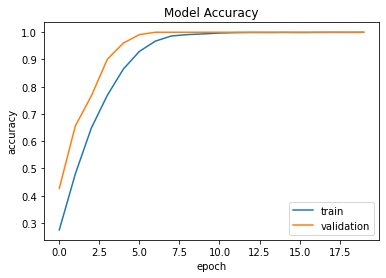

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(arr_te,np.array(y_te_hot),verbose=0)
print('accuracy : ',test_acc)

predict_x=model.predict(arr_te)
y_pred=np.argmax(predict_x,axis=1)+1

cm=confusion_matrix(y_te,y_pred.reshape((len(y_pred),1)))
print('confusion matrix is ')
print(cm)

accuracy :  1.0
confusion matrix is 
[[561   0   0   0   0   0   0]
 [  0 363   0   0   0   0   0]
 [  0   0 557   0   0   0   0]
 [  0   0   0 324   0   0   0]
 [  0   0   0   0 602   0   0]
 [  0   0   0   0   0 638   0]
 [  0   0   0   0   0   0 388]]


In [ ]:
print('Overall accuracy :',(cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]+cm[6][6])/len(arr_te)*100)
for i in range(7):
  print(f'Accuracy of class {i+1} is :',cm[i][i]/np.sum(cm[i])*100)

Overall accuracy : 100.0
Accuracy of class 1 is : 100.0
Accuracy of class 2 is : 100.0
Accuracy of class 3 is : 100.0
Accuracy of class 4 is : 100.0
Accuracy of class 5 is : 100.0
Accuracy of class 6 is : 100.0
Accuracy of class 7 is : 100.0
